

# **Customer Segmentation Comparison: Manual vs. Machine Learning-Based Approaches**




## **Description**

The `comparison.ipynb` notebook provides a **full analytical framework** for comparing **manual (rule-based)** and **machine-learning-based (K-Means/DBSCAN)** customer segmentations using the `SegmentationComparator` class.

It evaluates how closely both approaches align by computing key statistical metrics such as **ARI**, **NMI**, **Fowlkes-Mallows**, **Homogeneity**, **Completeness**, and **V-Measure**. The notebook includes multiple **visualizations**—segment size bar charts, cross-tabulation heatmaps, overlap plots, and perk-agreement pie charts—to highlight structural differences between segmentation methods.

Beyond metrics, it delivers **business-relevant insights**, including segment stability, chi-square independence tests, and feature comparisons (e.g., spend, trips), helping determine which segmentation better reflects customer behavior.

Finally, the notebook provides **actionable recommendations** for improving segmentation quality, addressing low-alignment segments, and refining clustering outcomes. It is designed for marketing teams, data scientists, and analysts who want **data-driven validation** of their segmentation strategy and clear guidance on whether ML-based segmentation should complement or replace manual methods.

In [1]:
import os
import sys
# --- Setup ---
%load_ext autoreload
%autoreload 2
%matplotlib inline

bad_paths = [
    "/Users/guykaptue/my_work_spaces/machine learning",
    "/Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/src"
]
sys.path = [p for p in sys.path if os.path.abspath(p) not in bad_paths]

print("Clean sys.path:")
for p in sys.path:
    print(" -", p)

Clean sys.path:
 - /opt/anaconda3/envs/ml311/lib/python311.zip
 - /opt/anaconda3/envs/ml311/lib/python3.11
 - /opt/anaconda3/envs/ml311/lib/python3.11/lib-dynload
 - 
 - /opt/anaconda3/envs/ml311/lib/python3.11/site-packages
 - __editable__.tts_mastery_project-0.1.0.finder.__path_hook__


In [2]:
import pandas as pd  # noqa: F401
import numpy as np  # noqa: F401
from IPython.display import display

# ------------------------------------------------------------
# 1️⃣ Determine project root dynamically
# - Works even if notebook is in a subfolder of notebooks/
# ------------------------------------------------------------
cwd = os.getcwd()
print("Current working directory:", cwd)

# Project root = traveltide_project folder
# Assumes notebooks/ is directly under traveltide_project/
project_root = os.path.abspath(os.path.join(cwd, "..", "..", ".."))
print("Project root:", project_root)

## ------------------------------------------------------------
# 2️⃣ Add project root to sys.path for imports
# ------------------------------------------------------------
if project_root not in sys.path:
    sys.path.insert(0, project_root)

print("Project root added to sys.path:", project_root)

print(sys.path)  # Ensure /traveltide_project is included

# Check if src exists
print(os.path.exists(os.path.join(project_root, "src")))

Current working directory: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/notebooks/segments/comparison
Project root: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project
Project root added to sys.path: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project
['/Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project', '/opt/anaconda3/envs/ml311/lib/python311.zip', '/opt/anaconda3/envs/ml311/lib/python3.11', '/opt/anaconda3/envs/ml311/lib/python3.11/lib-dynload', '', '/opt/anaconda3/envs/ml311/lib/python3.11/site-packages', '__editable__.tts_mastery_project-0.1.0.finder.__path_hook__']
True


In [3]:
# Verify that src is importable
try:
    import src
    print("✅ src module found at:", src.__file__)
except ModuleNotFoundError:
    print("❌ src module not found. Check your sys.path!")


╔════════════════════════════════════════════════════════════════╗
║              ML CUSTOMER SEGMENTATION MODULE                   ║
║                      Version 1.0.0                            ║
╚════════════════════════════════════════════════════════════════╝

📦 Package: core.segment.ml_model
👤 Author: Guy Kaptue
📝 Description: ML Customer Segmentation with K-Means and DBSCAN

🎯 Supported Algorithms:
   • K-Means - Fixed cluster count, balanced segments
   • DBSCAN - Density-based, automatic cluster detection

📊 Quality Metrics:
   • Silhouette Score (cluster separation)
   • Davies-Bouldin Index (cluster quality)
   • Calinski-Harabasz Score (variance ratio)
   • Business alignment metrics

🚀 Quick Start:
   >>> from core.segment.ml_model import MLClustering
   >>> ml = MLClustering('config/ml_config.yaml')
   >>> results = ml.run_both(your_dataframe)

📚 Documentation:
   See README.md for complete usage guide

💡 Need help?
   • Check config/ml_config.yaml for settings
   • Re

In [4]:
from src.core import (
    DataLoader, # noqa: F401
    SegmentationComparator  
) 

In [5]:
loader = DataLoader()
customer_segmentation=loader.load_table(data_type='non_ml', table_name='customer_segmentation_detailed')

kmeans_segmentation=loader.load_table(data_type='kmeans', table_name='kmeans_segmentation')


✅ Verbindung zur PostgreSQL-Datenbank hergestellt.
📁 Lade Tabelle 'customer_segmentation_detailed' aus CSV: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/data/csv/processed/segment/non_ml/customer_segmentation_detailed.csv
✅ CSV geladen. Zeilen: 5998
📁 Lade Tabelle 'kmeans_segmentation' aus CSV: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/data/csv/processed/segment/ml_model/kmeans/kmeans_segmentation.csv
✅ CSV geladen. Zeilen: 5998


In [6]:
comparison = SegmentationComparator(
    manual_segmentation= customer_segmentation,
    ml_segmentation=kmeans_segmentation
)

✅ SegmentationComparator initialized
   Manual: 5,998 users
   ML: 5,998 users



RUNNING COMPLETE SEGMENTATION COMPARISON
[MERGE] Combining datasets...
   ✅ Merged: 5,998 users
[METRICS] Calculating alignment...
   ✅ Adjusted Rand Index: 0.042
   ✅ Normalized Mutual Info: 0.097

   Perk Agreement Rate: 50.6%
[VISUALIZATION] Creating plots...
   ✅ Saved: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/reports/segment/comparison/segmentation_comparison.png


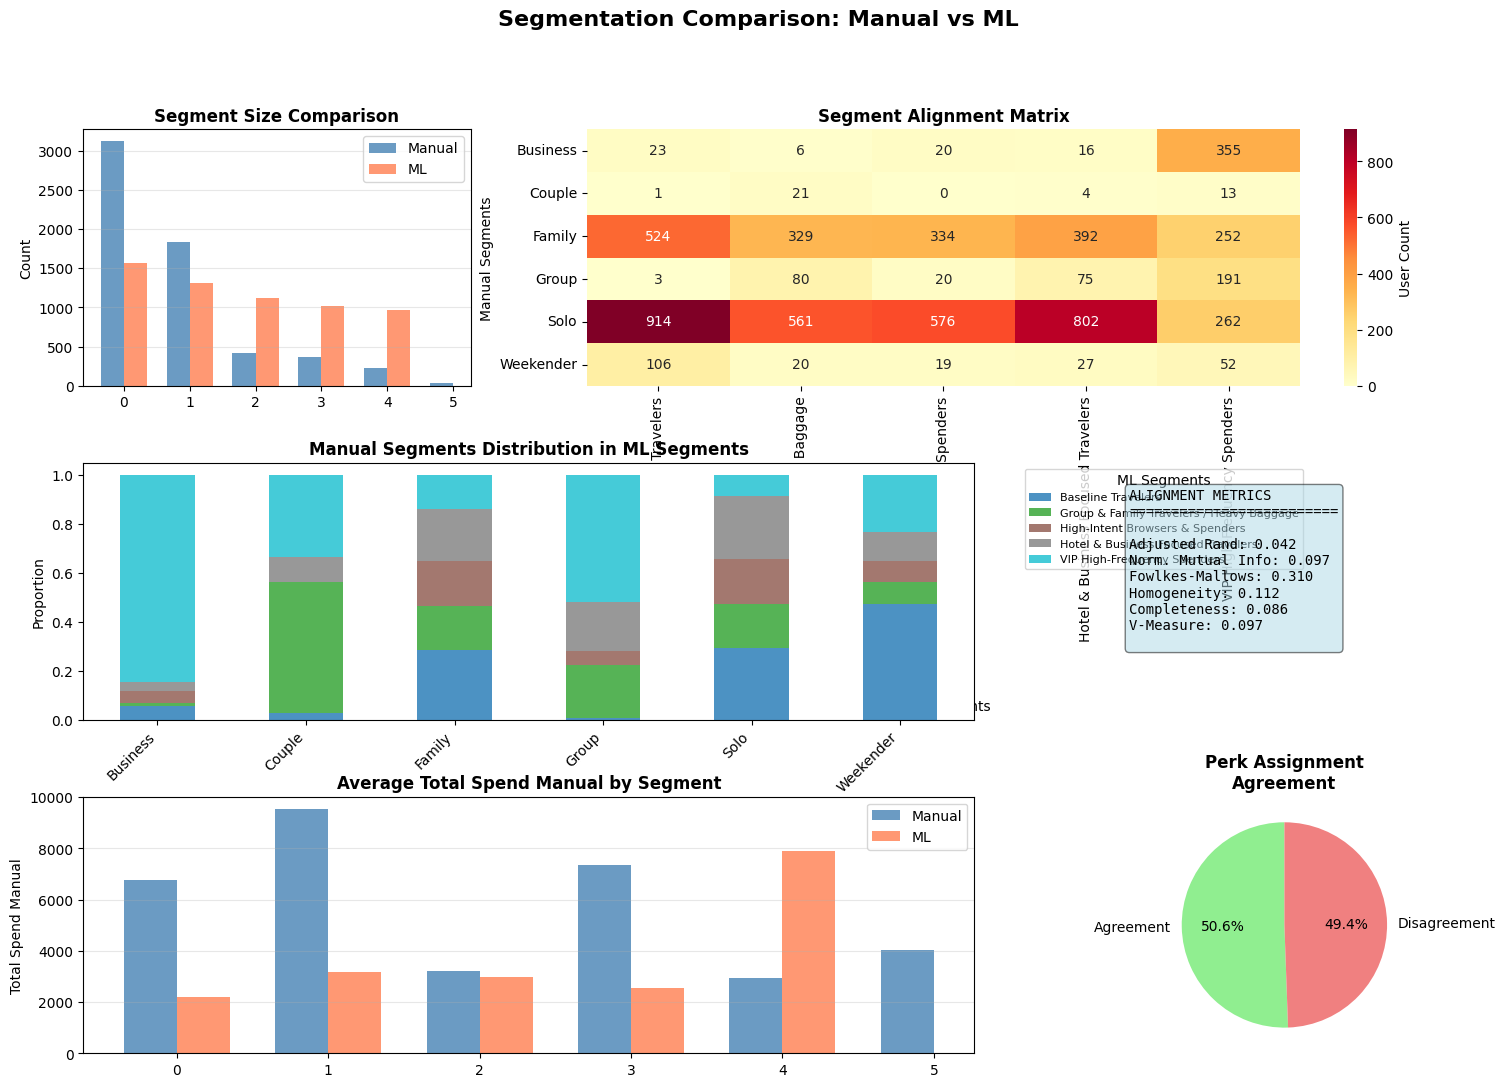


SEGMENTATION COMPARISON REPORT

[METRICS] Calculating alignment...
   ✅ Adjusted Rand Index: 0.042
   ✅ Normalized Mutual Info: 0.097
   Chi-square: 1907.817, p-value: 0.0000, dof: 20
Total Users Compared: 5,998

ALIGNMENT METRICS
----------------------------------------------------------------------
  Adjusted Rand Index: 0.042
  Normalized Mutual Info: 0.097
  Fowlkes Mallows Score: 0.310
  Homogeneity: 0.112
  Completeness: 0.086
  V Measure: 0.097

CHI-SQUARE INDEPENDENCE TEST
----------------------------------------------------------------------
  Chi-square: 1907.817
  p-value: 0.0000
  Degrees of freedom: 20
  Interpretation: Dependent (p < 0.05)

SEGMENT STABILITY
----------------------------------------------------------------------
  Average Purity: 49.2%
  Min Purity: 28.6%
  Max Purity: 84.5%

SEGMENT OVERLAP ANALYSIS
----------------------------------------------------------------------

  Solo:
    Size: 3,115
    → Maps to: Baseline Travelers
    → Alignment: 29.3%

  F

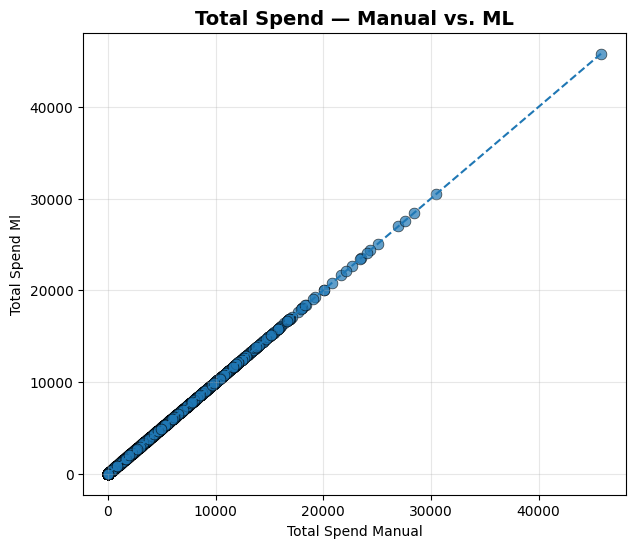

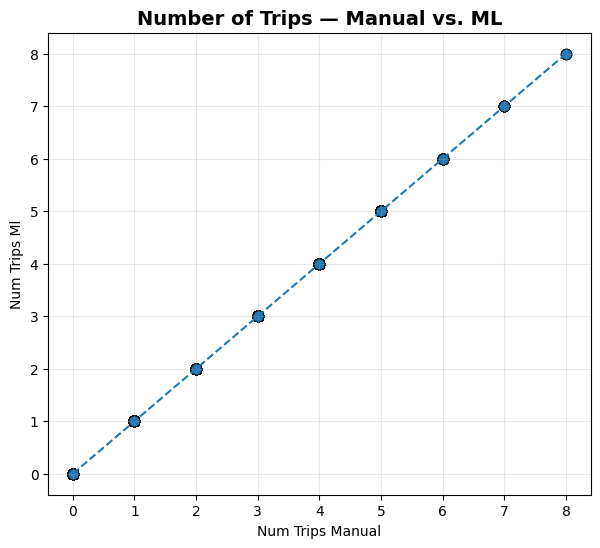

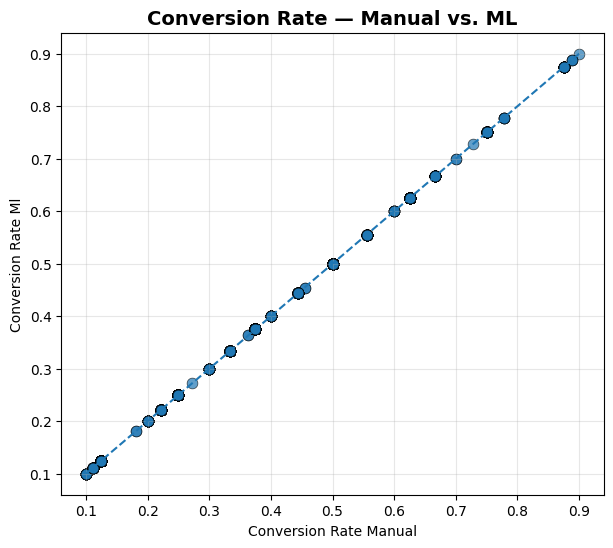

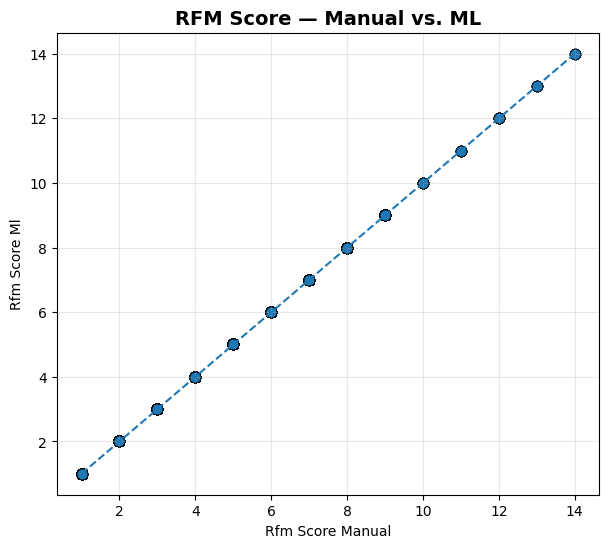

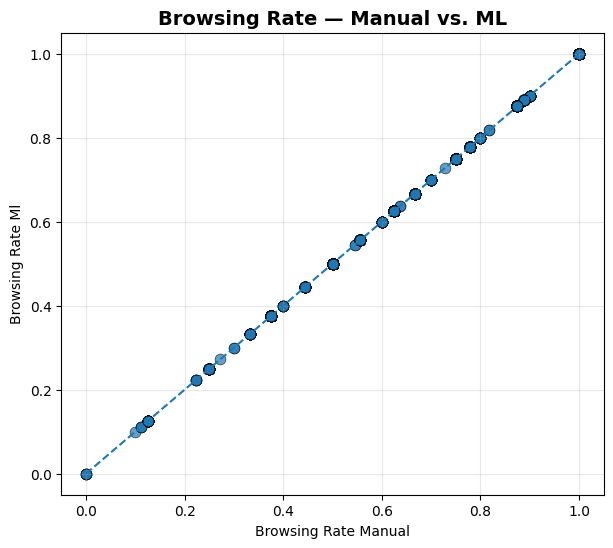

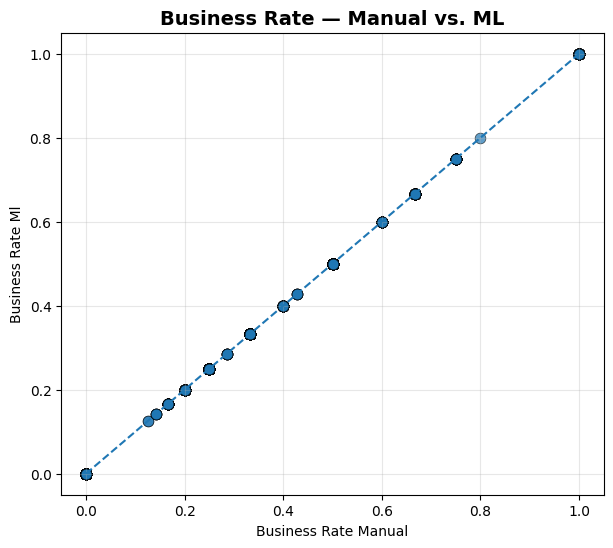

✅ All comparison plots generated.
📊 Scatter plots saved:
   total_spend: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/reports/segment/comparison/plot_total_spend_manual_total_spend_ml.png
   num_trips: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/reports/segment/comparison/plot_num_trips_manual_num_trips_ml.png
   conversion_rate: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/reports/segment/comparison/plot_conversion_rate_manual_conversion_rate_ml.png
   rfm_score: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/reports/segment/comparison/plot_RFM_score_manual_RFM_score_ml.png
   browsing_rate: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/reports/segment/comparison/plot_browsing_rate_manual_browsing_rate_ml.png
   business_rate: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/rep

{'metrics': {'adjusted_rand_index': 0.04177566892899049,
  'normalized_mutual_info': 0.09707017109044803,
  'fowlkes_mallows_score': 0.3096094245503038,
  'homogeneity': 0.11213144184720283,
  'completeness': 0.08557580086068489,
  'v_measure': 0.09707017109044803},
 'overlap': {'Solo': {'size': 3115,
   'dominant_ml_segment': 'Baseline Travelers',
   'dominant_percentage': np.float64(0.29341894060995183),
   'distribution': {'Baseline Travelers': 0.29341894060995183,
    'Hotel & Business Focused Travelers': 0.2574638844301766,
    'High-Intent Browsers & Spenders': 0.18491171749598717,
    'Group & Family Travelers / Heavy Baggage': 0.18009630818619582,
    'VIP High-Frequency Spenders': 0.0841091492776886},
   'purity': np.float64(0.29341894060995183)},
  'Family': {'size': 1831,
   'dominant_ml_segment': 'Baseline Travelers',
   'dominant_percentage': np.float64(0.2861824139814309),
   'distribution': {'Baseline Travelers': 0.2861824139814309,
    'Hotel & Business Focused Traveler

In [7]:
comparison.run_complete_analysis()



# **Storytelling Interpretation of the Segmentation Comparison Results**

The goal of this analysis was to understand **how closely the manual customer segments match the ML-generated segments**, and what these differences tell us about customer behavior, labeling consistency, and perk management.

The results paint a **consistent, data-driven story**:
 **The two segmentation systems view customers very differently**, with only a few areas of strong alignment.

Let’s walk through what the data reveals.

---

# **1. 🔍 Overall Alignment Is Very Low — The Two Systems Disagree**

The two segmentation systems produce meaningfully different outcomes:

* **Adjusted Rand Index (ARI): 0.042**
* **Normalized Mutual Information (NMI): 0.097**
* **Fowlkes-Mallows: 0.31**
* **Homogeneity: 0.112**
* **Completeness: 0.086**
* **V-Measure: 0.097**

 These values are **close to zero**, meaning:

**The manual and ML segmentations almost never put the same users in the same groups.**

This means the systems are:

* capturing *different behavioral signals*,
* optimizing for *different segmentation logic*, or
* one of them may not reflect real customer behavior well.

---

# **2. Despite Low Alignment, They Are Statistically Connected**

A chi-square test shows:

* **χ² = 1,907.8**,
* **p-value < 0.00001**,
* **degrees of freedom = 20**

Even though the labels don’t match well, the two systems are **not random with respect to each other**.
Certain manual segments consistently lean toward certain ML segments.

This leads us to the next insight…

---

# **3.  Segment-Level Story: Some Manual Segments Map Clearly to ML Segments**

Even with low overall alignment, some segments match reasonably well.

## ** Business Travelers → ML “VIP High-Frequency Spenders”**

* **84.5% purity** (very strong)
* **355 of 420** business travelers fall in this ML segment.

*Story*:
The ML model detects business-like behavior—frequent travel, high spend—and clusters them tightly. The manual rules for “Business” seem correct and ML agrees strongly.

---

## ** Group Travelers → ML “VIP High-Frequency Spenders”**

* **51.8% purity**
* Many group travelers move into high-spend ML clusters.

*Story*:
Group travelers behave more like high-spending patterns than “group-style travel.” They book more seats, buy more add-ons, and cluster as frequent spenders.

---

## ** Weekenders → Mostly ML “Baseline Travelers”**

* **47.3% purity**

*Story*:
Weekenders are relatively ordinary travelers—short trips, moderate budget—which ML also detects.

---

## ** Solo and Family: Extremely Mixed Segments**

* Solo purity: **29.3%**
* Family purity: **28.6%**
* Both scatter across *almost every* ML cluster.

*Story*:
Manual labels “Solo” and “Family” do **not reflect distinct behavioral patterns**.

ML sees these customers behaving similarly to multiple other groups—indicating the manual definition is driven by demographic-style rules, not by behavior.

---

## ** Couple: Very Small Segment With Mixed Behavior**

* Only **39 users**
* Purity: **53.8%**

*Story*:
Because the segment is so small, it’s not operationally useful, and ML cannot reliably detect similar behavior.

---

# **4. Stability: Most Segments Are Not Behaviorally Cohesive**

Average purity across manual segments:
**49.2%**

Meaning:
**On average, only half of each manual segment behaves similarly enough to fall into the same ML cluster.**

The two least stable segments:

* Family (**28.6%** purity)
* Solo (**29.3%**)

The most stable segment:

* Business (**84.5%**)

*Story*:
Some manual segments capture clear behavior (Business), while others are too broad or rule-based to show true behavioral consistency.

---

# **5. Perk Assignment: A Perfect 50/50 Split**

**Perk Agreement Rate: 50.6%**

Meaning:
**Half of customers receive different perks depending on the segmentation method.**

This can create:

* inconsistent customer experience
* fairness issues
* unpredictable cost/leakage for perks
* campaign inefficiency

Example insights:

* “Exclusive discounts” → kept consistent in **18.6%** of users.
* “1 night free hotel + flight” matched in **13.3%**.
* Other perk transitions are scattered across many mismatched pairs.

*Story*:
Because segments don’t align, perks don’t align either. Nearly half of customers would receive different benefits, which can be costly and confusing.

---

# **6.Segment Size Mismatch: Manual Segments Are Imbalanced**

* Solo: **52%** of users
* Family: **31%**
* Rest are < 10%
* Couple is < 1% (39 users)

*Story*:
Manual segmentation creates an imbalanced population distribution, making campaigns harder to target and making some segments statistically weak.

The ML model, by contrast, creates more balanced clusters.

---

# **Final Story Summary (Clear Takeaway)**

Your comparison tells a clear and compelling story:

> **The manual segmentation system and the ML segmentation system view customers in fundamentally different ways. Manual segments—especially Solo and Family—do not capture true behavioral differences. ML segments appear more behavior-driven and reveal patterns that manual rules miss.**

* Only **one** manual segment (Business) aligns strongly with ML behavior.
* The rest show **low purity**, meaning they contain a mix of different behavioral profiles.
* Perk assignment varies for **49% of users**, creating inconsistency.
* Manual segmentation is highly **imbalanced**, limiting campaign usefulness.

---

# **Strategic Interpretation (What This Means for the Business)**

### **1. Manual segmentation needs refinement**

Some manual categories (Solo, Family) are not behaviorally meaningful.

### **2. ML segmentation detects clearer behavioral patterns**

Especially around spending, frequency, and travel intent.

### **3. Hybrid segmentation could be ideal**

Use manual labels for communication style

* ML clusters for behavioral targeting.

### **4. Perk strategy requires review**

Because perks diverge so much, rely more on ML clusters for perk eligibility.

### **5. Consider consolidating tiny manual segments**

Such as Couple (<1%), which cannot support campaigns at scale.


